In [ ]:
# you try

In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import numpy as np
import scipy.interpolate as interp
import xarray as xr

In [2]:
def draw_patches(fmask, ll, ul, u_lons, w_depths):
    topo = []
    for i in range(ll, ul):
        for j in range(39):
            if fmask[j, i] == 0:
                rect = Rectangle((u_lons[i], w_depths[j]), u_lons[i+1]-u_lons[i], w_depths[j+1]-w_depths[j])
                topo.append(rect)
    pc = PatchCollection(topo, facecolors='lightgray', edgecolors='lightgray')
    return(pc)

In [ ]:
section_name = 'Haro'
CSharo = [6, 218-1, 242, 304, 300]
figrid = CSharo[3]
igrid = figrid-1
js, je = CSharo[1], CSharo[2]
section = CSharo[0]

In [41]:
section_name = 'Rosario'
CSrosario = [4, 286, 307, 266, 300]
figrid = CSrosario[3]
igrid = figrid-1
js, je = CSrosario[1]-3, CSrosario[2]
section = CSrosario[0]

In [13]:
section_name = 'Admiralty'
CSadmiralty = [2, 255, 267, 204, 300]
figrid = CSadmiralty[3]
igrid = figrid-1
js, je = CSadmiralty[1]-5, CSadmiralty[2]
section = CSadmiralty[0]

In [42]:
mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdepw_1d)
f_lons = mymesh.glamf[0, igrid]
u_lons = mymesh.glamv[0, igrid] 
fmask = mymesh.fmask[0, :, igrid]
w_depths = mymesh.gdepw_1d

In [43]:
m2lon = ((u_lons[je]-u_lons[js])/(mymesh.e2f[0, igrid, js:je].sum())).values
print (m2lon)

1.0352542701412316e-05


In [44]:
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)

In [45]:
yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
starttime = 1+(5*720+(sum(yearjumps[:5+1]*24)))
endtime = 720+(8*720+(sum(yearjumps[:8+1]*24)))
time = endtime - starttime +1

In [46]:
def get_data(mydata, starttime, endtime, time, section):
    salt = mydata.init_salt[(mydata.init_t >= starttime) & (mydata.init_t <= endtime) & (mydata.final_section==section)]
    init_z = mydata.init_z[(mydata.init_t >= starttime) & (mydata.init_t <= endtime) & (mydata.final_section==section)]
    final_z = mydata.final_z[(mydata.init_t >= starttime) & (mydata.init_t <= endtime) & (mydata.final_section==section)]
    trans = mydata.final_transp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime) & (mydata.final_section==section)]/(time)
    init_trans = mydata.init_transp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime) & (mydata.final_section==section)]/(time)
    lons = mydata.final_lon[(mydata.init_t >= starttime) & (mydata.init_t <= endtime) & (mydata.final_section==section)]
    return salt, init_z, final_z, trans, init_trans, lons

In [47]:
salt, init_z, final_z, trans, init_trans, lons = get_data(mydata, starttime, endtime, time, section)

In [48]:
print (depthf(final_z).shape, figrid, js, je)

(1, 19031) 266 283 307


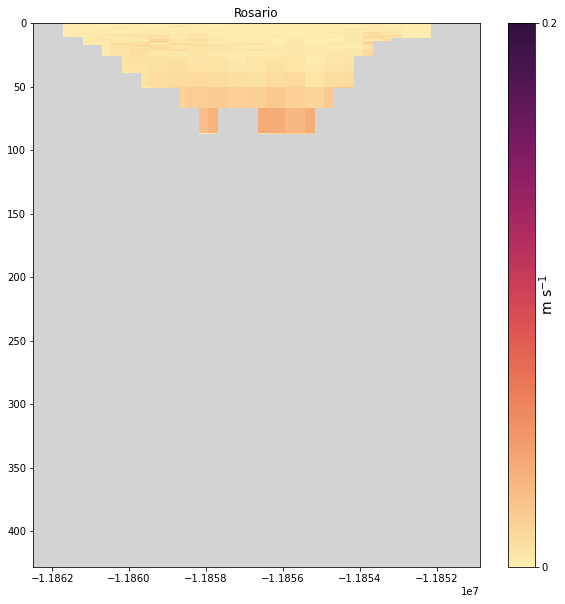

In [49]:
gridding = 1
high = 0.2
vmax = high/trans.sum().values
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
c, xedge, yedge, im = ax.hist2d(lons/m2lon, 
                                depthf(final_z)[0],
                                weights=trans,
                                bins=[np.array(f_lons[js:je:gridding])/m2lon, w_depths[0]],
                                cmap=cm.matter, 
                                density=True, vmax=vmax)

ax.invert_yaxis()


cb1 = fig.colorbar(im, ax=ax)
cb1.set_ticks([0, vmax])
cb1.set_ticklabels([0, high, 2]) 
cb1.set_label('m s$^{-1}$', labelpad=-20, fontsize=14)


pc = draw_patches(fmask, js, je, np.array(u_lons)/m2lon, np.array(w_depths[0]))
ax.add_collection(pc);
ax.set_title(section_name);
fig.savefig(f'{section_name}.pdf')

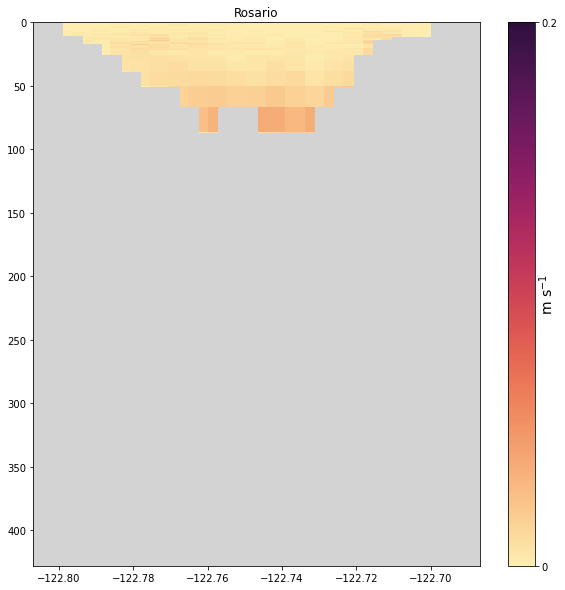

In [50]:
gridding = 1
high = 0.2
vmax = high/trans.sum().values/m2lon
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
c, xedge, yedge, im = ax.hist2d(lons, 
                                depthf(final_z)[0],
                                weights=trans,
                                bins=[np.array(f_lons[js:je:gridding]), w_depths[0]],
                                cmap=cm.matter, 
                                density=True, vmax=vmax)

ax.invert_yaxis()


cb1 = fig.colorbar(im, ax=ax)
cb1.set_ticks([0, vmax])
cb1.set_ticklabels([0, high, 2]) 
cb1.set_label('m s$^{-1}$', labelpad=-20, fontsize=14)


pc = draw_patches(fmask, js, je, np.array(u_lons), np.array(w_depths[0]))
ax.add_collection(pc);
ax.set_title(section_name);
fig.savefig(f'{section_name}_lons.pdf')